# **CS372 Assignment 2: Decision Tree**

### Group # 
### **Students Name**

# **Summary**

## **Question 1**

- Download the **Bank Personal Loan Information** data from course Moodle.
- Load Data from CSV file to ['Pandas data frame'](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
- To implement your Decision tree model, you need to:
    - Identify your target feature and descriptive features. In our case, Personal Loan will be our target feature and the rest of the features (descriptive features) will be used to predict Personal loan.

#### Import Libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn import tree
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

#### Load Bank Personal Loan Information Data

In [57]:
# Load the dataset from the second sheet named "Data"
ds = pd.read_excel("Personal Loan Data_DT.xlsx", sheet_name='Data', header=0, index_col=0)
ds.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
228,47,23.0,148,94551,2,7.5,Undergrad,0,0,0,1,1,1
230,48,24.0,71,93117,2,1.7,Undergrad,145,0,0,0,0,1
234,62,37.0,58,91320,4,1.7,Undergrad,0,0,0,0,1,0
239,57,32.0,28,95831,3,0.2,Undergrad,0,0,0,0,1,1
241,51,26.0,70,90089,1,1.2,Undergrad,169,0,0,0,0,0


### **[15 points]** Exploratory Data Analysis
1. **[6 points]** Check for:
    - **[2 points]** ['duplicates'](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html), show the last duplicates. Choose one of the methods we studied in the class to deal with duplicate records (if any) and explain how and why you did that.
    - **[2 points]** ['missing data'](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) in the data frame. Choose one of the methods we studied in the class to deal with missing values, if any. Make sure to explain what you used to fill out missing data. Note that zero is a value not missing data.
    - **[2 points]** Check for Outliers using ['Boxplot'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) graphs. Make sure to add necessary labels for each plot. Upon detection, show and explain how you dealt with outliers, justify your choice.
3. **[4 points]** Draw ['scatter plot'](https://seaborn.pydata.org/examples/scatterplot_matrix.html) matrix for all features and comment on the plot.
4. **[5 points]** ['Heatmap correlation'](https://seaborn.pydata.org/generated/seaborn.heatmap.html): Draw a heatmap plot between all independent variables and dependent variables. Comment on your heatmap (i.e. the strength and the direction of the correlation between features).

#### **1.** Check Duplicate Data

In [58]:
duplicates = ds[ds.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


#### Handle Duplicate Data

In [59]:
ds.drop_duplicates(inplace=True) # throw away duplicate data

#### **Explain how you dealt with duplicates**

Exmplain how you dealt them, why, and justify your choice here.

#### Check Missing Data

In [60]:
# Removing Zip Code as it is not useful for prediction
ds = ds.drop(columns=['ZIP Code'])

# check missing data and show the records
# Delete all Experience that are negative and predict these as well
ds['Experience'] = ds['Experience'].apply(lambda x: np.nan if x < 0 else x)

missing_data = [] # This variable is used to store the IDs with missing values
for i in range(len(ds)):
    for j in ds.columns:
        if pd.isnull(ds.loc[ds.index[i],j]):
            print(f"Index: '{ds.index[i]}' Column: '{j}' is blank")
            missing_data.append(ds.index[i])

Index: '400' Column: 'Experience' is blank
Index: '525' Column: 'Experience' is blank
Index: '598' Column: 'Experience' is blank
Index: '671' Column: 'Experience' is blank
Index: '794' Column: 'Experience' is blank
Index: '910' Column: 'Experience' is blank
Index: '1429' Column: 'Experience' is blank
Index: '1906' Column: 'Experience' is blank
Index: '2431' Column: 'Experience' is blank
Index: '3158' Column: 'Experience' is blank
Index: '3293' Column: 'Experience' is blank
Index: '3426' Column: 'Experience' is blank
Index: '3825' Column: 'Experience' is blank
Index: '3888' Column: 'Experience' is blank
Index: '4016' Column: 'Experience' is blank
Index: '4117' Column: 'Experience' is blank
Index: '4286' Column: 'Experience' is blank
Index: '227' Column: 'Experience' is blank
Index: '537' Column: 'Experience' is blank
Index: '584' Column: 'Experience' is blank
Index: '687' Column: 'Experience' is blank
Index: '1020' Column: 'Experience' is blank
Index: '1174' Column: 'Experience' is blan

#### Handle Missing Data

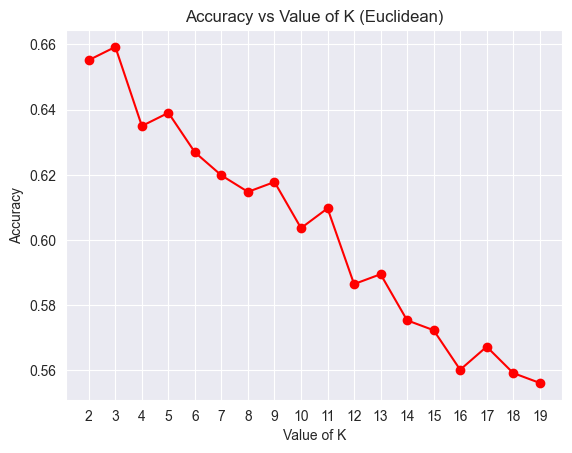

highest Accuracy (Euclidean): 0.66, K: 3
      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
ID                                                                  
228  47.0        23.0   148.0     2.0    7.5        1.0       0.0   
230  48.0        24.0    71.0     2.0    1.7        1.0     145.0   
234  62.0        37.0    58.0     4.0    1.7        1.0       0.0   
239  57.0        32.0    28.0     3.0    0.2        1.0       0.0   
241  51.0        26.0    70.0     1.0    1.2        1.0     169.0   
..    ...         ...     ...     ...    ...        ...       ...   
216  38.0        14.0    92.0     2.0    0.0        1.0     249.0   
217  27.0         3.0   125.0     2.0    0.6        1.0       0.0   
218  39.0        14.0    74.0     3.0    3.0        1.0       0.0   
221  32.0         6.0    25.0     2.0    0.3        1.0       0.0   
223  26.0         2.0   104.0     3.0    2.5        2.0       0.0   

     Personal Loan  Securities Account  CD Account  Online  C

In [61]:
# handle the missing data
# Prepare dataset for KNNImputation, this will use KNN to fill in the missing categorical values
df = ds.copy()

# Encode all the education 
education_encode = {'Undergrad' : 1, 'Graduate' : 2, 'Professional' : 3}
df['Education'] = df['Education'].map(education_encode) 
#df is the encoded dataset with the missing values

# Removing features that might not be useful to predict experience and education
# df_dropped will be used to calculate the missing values
df_dropped = df.drop(['Securities Account', 'CD Account', 'Personal Loan', 'Online', 'CreditCard'], axis=1)

# creating a copy of the dataframe to be manipulated by KNN
knn_df = df_dropped.copy() 

# drop empty values, this will be used for the knn
knn_df.dropna(inplace=True)

# Split the dataset 80/20
x = knn_df.drop(['Education'], axis=1)
y = knn_df['Education']

x_scaled = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, train_size=0.8, random_state=0, stratify=y)

high_acc = 0.0
nh = 0
accuracies = []

# find the best value of K for KNNImpute using KNN on a validation set
for n in range(2,20):
    knn1 = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', metric='euclidean')
    knn1.fit(x_train, y_train)
    x_pre = knn1.predict(x_test)

    accuracy = accuracy_score(y_test, x_pre)
    accuracies.append(accuracy)
    # print(f"Accuracy: {accuracy:.2f}, n_neighbour: {n}")
    if accuracy > high_acc:
        high_acc = accuracy
        nh = n
        
# Print out accuracy chart to k value
plt.figure()
plt.plot(range(2,20), accuracies, marker='o',  linestyle='-', color='r')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of K (Euclidean)')
plt.xticks(range(2,20))
plt.grid(True)
plt.savefig('AvK(Euclidean).jpg', format='jpg')
plt.show()

print(f"highest Accuracy (Euclidean): {high_acc:.2f}, K: {nh}")

# Initialize and set N value, dont use 1 to prevent over-fitting. 
knn_imputation = KNNImputer(n_neighbors=nh)

# Execute the KNN Imputation for the dataset
garbage_out = knn_imputation.fit_transform(df_dropped) #garbage_out is the encoded dataset with the categorised values

# Convert the new dataset into a DataFrame
corrected_df = pd.DataFrame(garbage_out, columns=df_dropped.columns, index=df_dropped.index) 

for column in df_dropped.columns:
    df[column] = corrected_df[column]
print(df)

corrected_df = df.copy()

#### **Explain how you dealt with missing data**

Exmplain how you dealt them, why, and justify your choice here.

#### Draw Box Plot

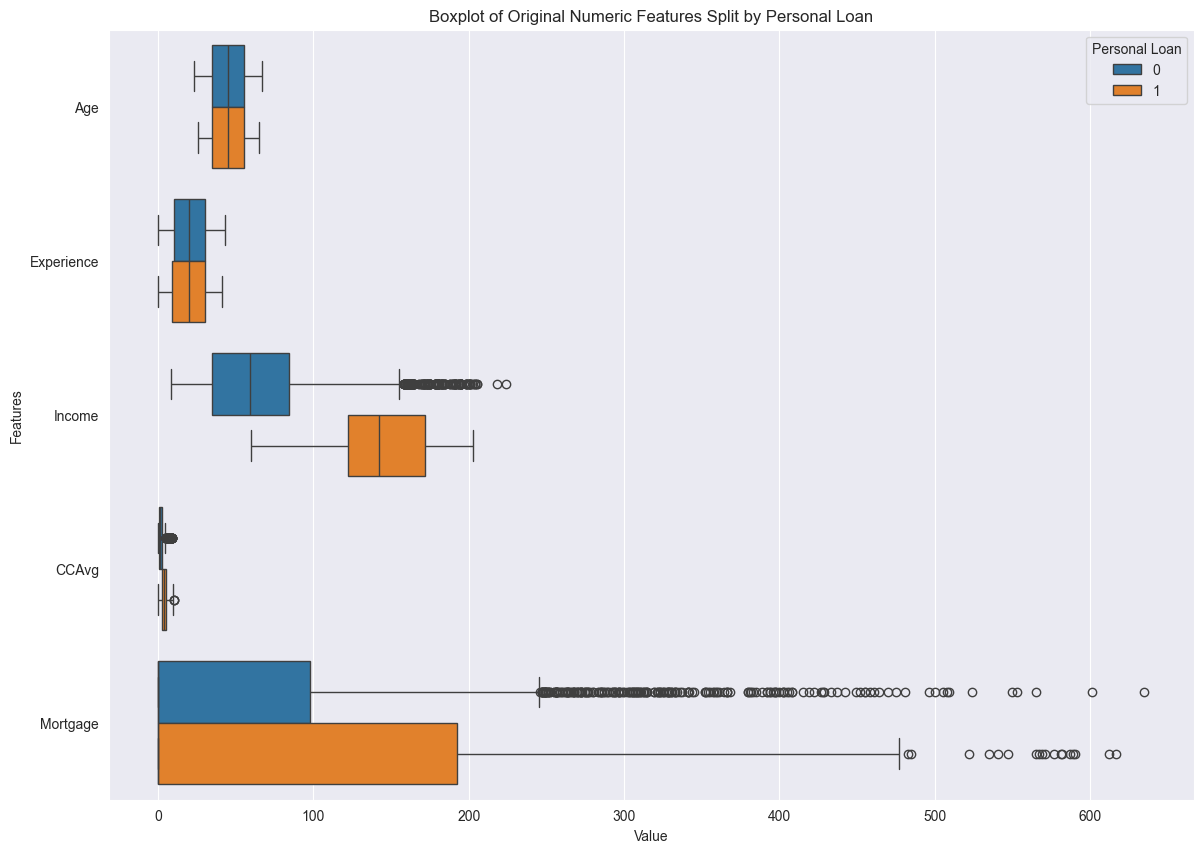

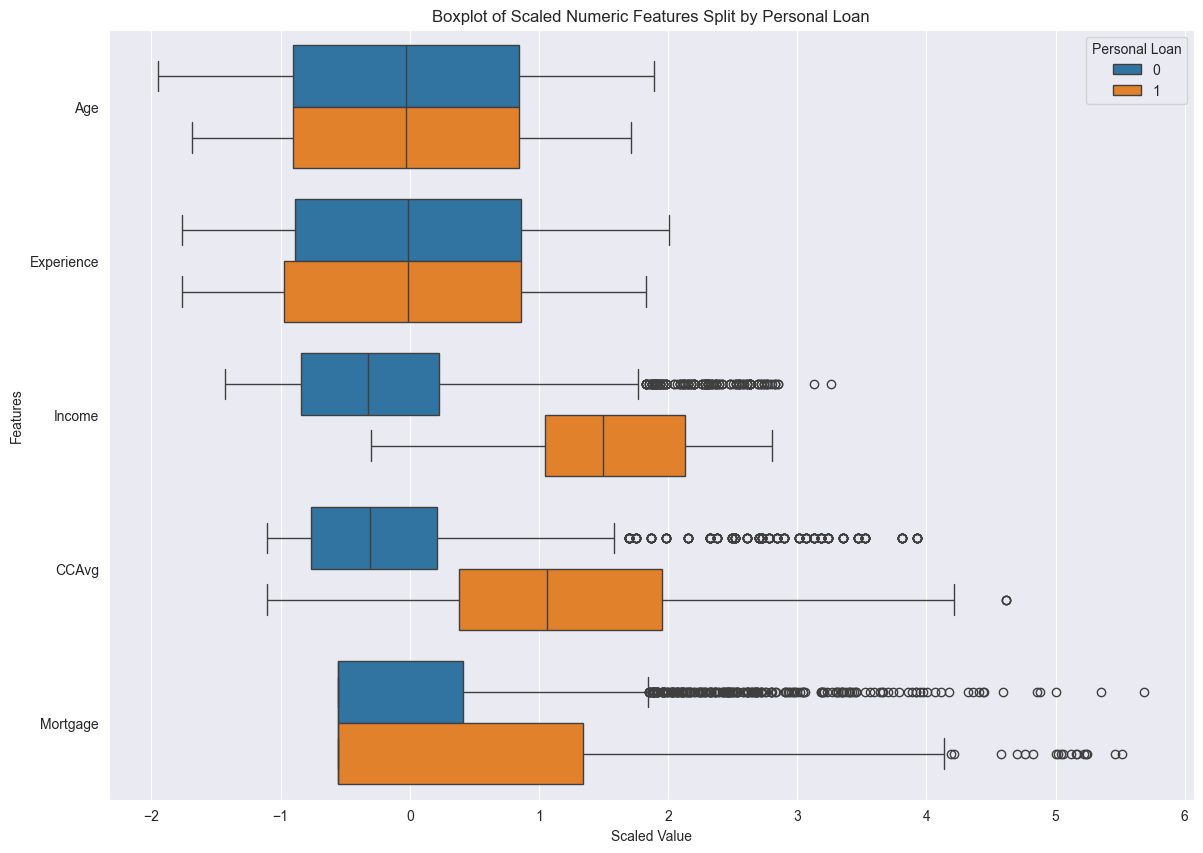

In [62]:
# Define continuous features
continuous_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# Combine the data for both Personal Loan = 0 and 1
corrected_df_long = corrected_df.melt(id_vars='Personal Loan', value_vars=continuous_features, 
                                      var_name='Feature', value_name='Value')

# Plot the combined boxplot for original values
plt.figure(figsize=(14, 10))
sns.boxplot(x='Value', y='Feature', hue='Personal Loan', data=corrected_df_long, orient='h')
plt.title('Boxplot of Original Numeric Features Split by Personal Loan')
plt.xlabel('Value')
plt.ylabel('Features')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

# Scale the continuous features
scaler = StandardScaler()
corrected_df_scaled_numeric = scaler.fit_transform(corrected_df[continuous_features])
corrected_df_scaled = pd.DataFrame(corrected_df_scaled_numeric, columns=continuous_features)
corrected_df_scaled['Personal Loan'] = corrected_df['Personal Loan'].values

# Combine the scaled data for both Personal Loan = 0 and 1
corrected_df_scaled_long = corrected_df_scaled.melt(id_vars='Personal Loan', value_vars=continuous_features, 
                                                    var_name='Feature', value_name='Value')

# Plot the combined boxplot for scaled values
plt.figure(figsize=(14, 10))
sns.boxplot(x='Value', y='Feature', hue='Personal Loan', data=corrected_df_scaled_long, orient='h')
plt.title('Boxplot of Scaled Numeric Features Split by Personal Loan')
plt.xlabel('Scaled Value')
plt.ylabel('Features')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

#### **Explain how Box Plot consider outliers in the dataset**

Add comments here

#### **Analyze and comment on the box plot**

Add comments here

#### **3.** Plot Scatter Matrix

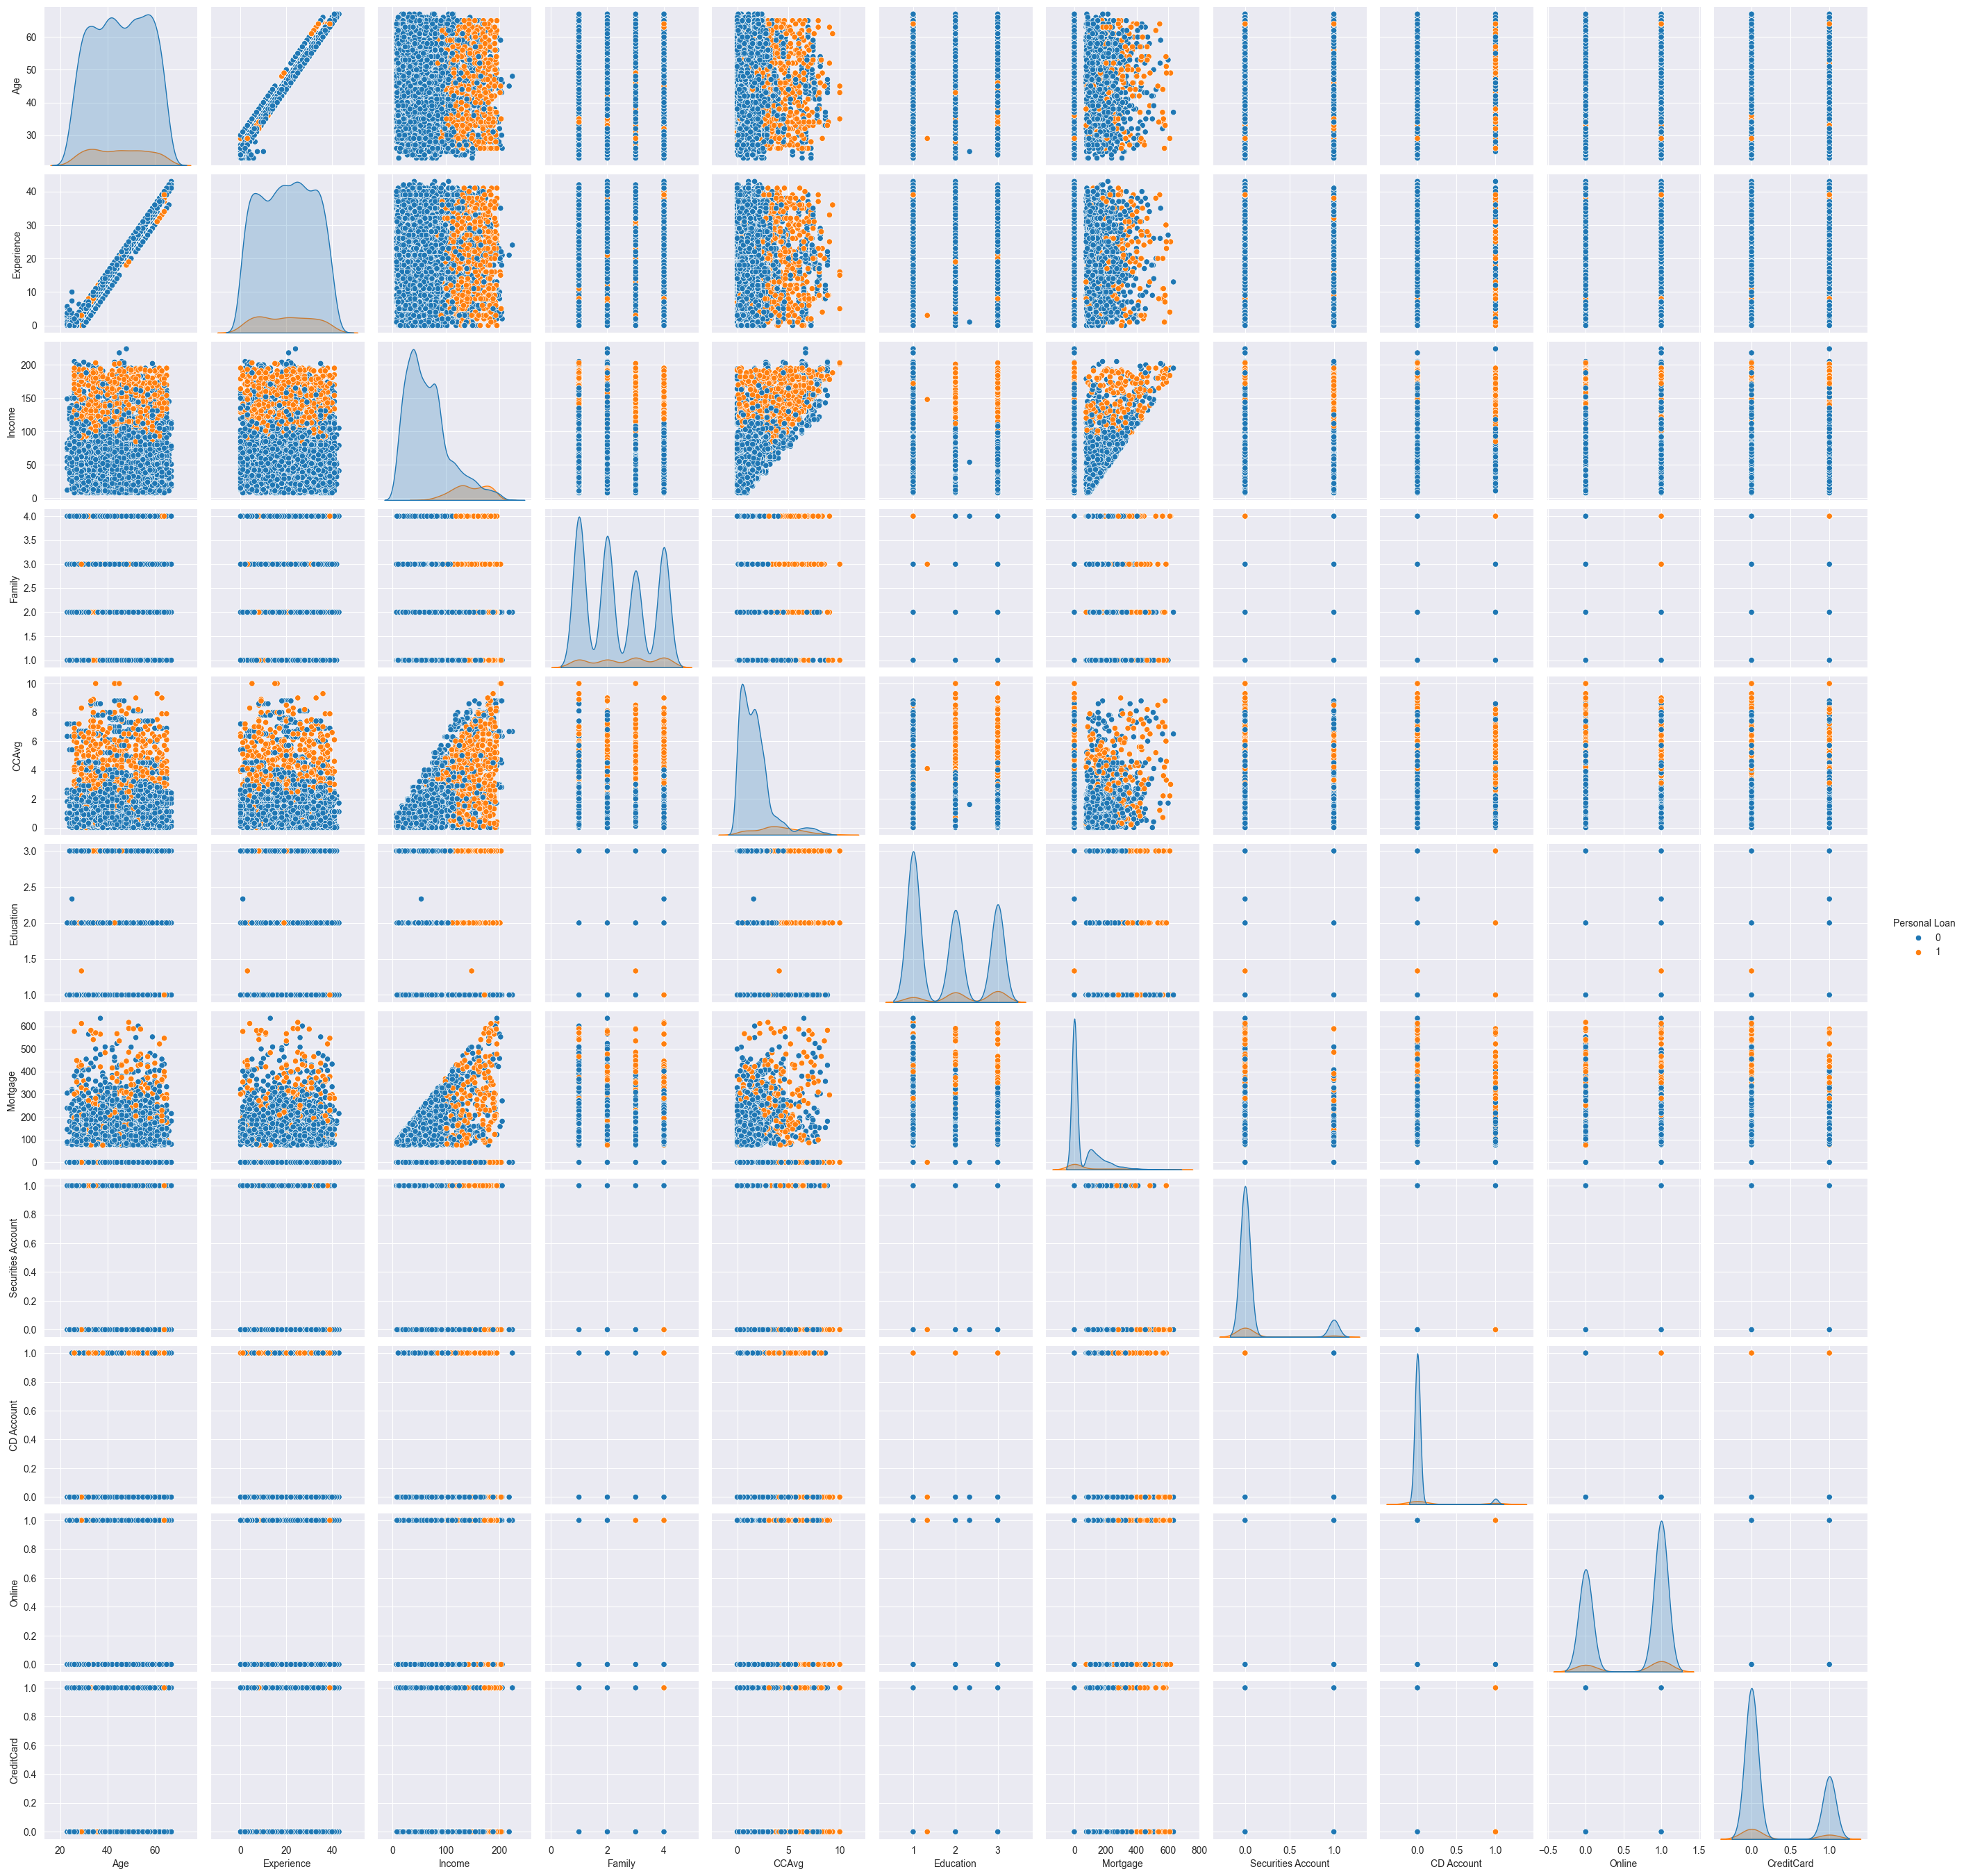

In [63]:
# Generate a scatterplot matrix
sns.pairplot(corrected_df, hue = 'Personal Loan') #hue as personal loan because it is our target variable
plt.savefig('scatterplot_matrix.jpg', format='jpg') 
plt.show()

#### **Analyze and comment on the scatter matrix plot**

Add comments here

#### **4.** Plot Heatmap Correlation

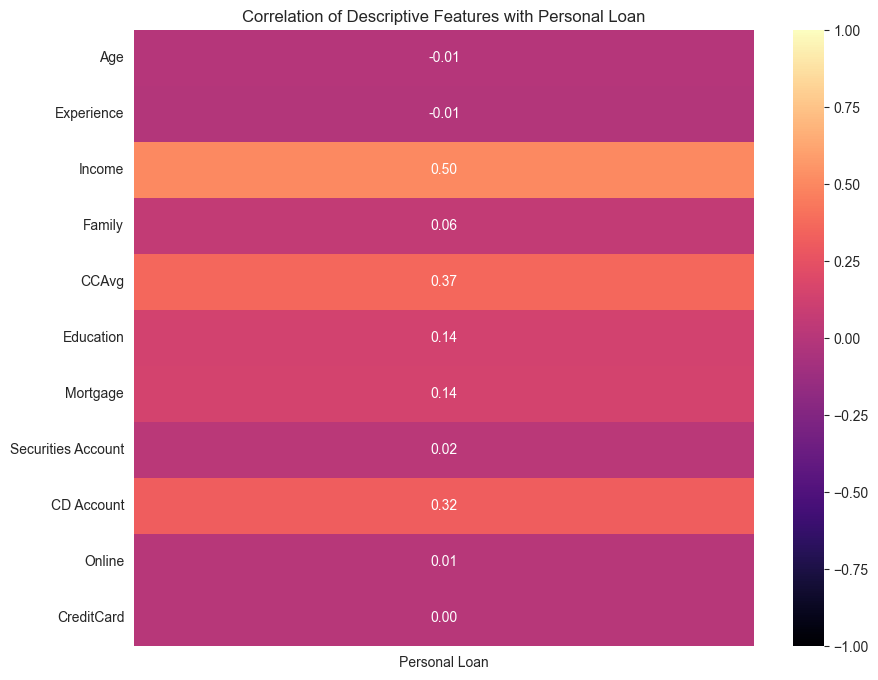

In [64]:
# Encode categorical variables into binary columns using one-hot encoding, dropping the first category
encoded_corrected_df = pd.get_dummies(corrected_df, drop_first=True)

# Compute the correlation matrix for the encoded dataset
correlation_matrix = encoded_corrected_df.corr()

# Extract correlations with the 'Personal Loan' column
personal_loan_correlation = correlation_matrix[['Personal Loan']].drop('Personal Loan')

# Plot the heatmap for 'Personal Loan' correlations
plt.figure(figsize=(10, 8))
sns.heatmap(personal_loan_correlation, annot=True, fmt=".2f", cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation of Descriptive Features with Personal Loan')
plt.show()

#### **Analyze and comment on the heatmap correlation plot**

Add comments here

### Decision Tree **[33 points]**

1. **[10 points]** To use categorical data with scikit-learn in Decision Trees, we have to use the One-Hot Encoding trick to convert categorical columns into multiple columns of binary values. There are two popular methods that you could use for this purpose, namely:
    - [ColumnTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) (from scikit-learn)
    - [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) (from pandas)
    - **Note that** One-Hot Encoding converts a column with more than 2 categories, and hence, we don’t need to process categorical features with only two categories.
2. **[3 points]** [Split your dataset 80/20](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  Train the model on the 80% fraction and then evaluate the accuracy on the 20% fraction. Make sure that if I run the algorithm again, I will get the same split and also the proportion of the classes are preserved in the split. Shuffle the data before split.
3. **[10 points]** Build and Compare two Decision Trees, [based on](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):
    - **[5 points]** Gini Impurity.
    - **[5 points]** Entropy.
4. **[10 points]** [Visualize](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) the fully grown Decision Trees you built (tree graph). (5 points for each tree)

#### **1.** One-Hot Encoding: convert categorical columns into multiple columns of binary values

In [65]:
# This would have been the code for One-Hot encoding, however, because One-Hot encoding was done to handle missing data in the 'Education' column
# there is no need to re-encode the 'Education' column

# Sample data with exactly five rows
# data = {
#    'Education': ['Graduate', 'Professional', 'Undergrad']
# }
# corrected_df = pd.DataFrame(data)

# Identify and define the categorical columns
# categorical_cols = ['Education']

# Apply One-Hot Encoding using ColumnTransformer
# preprocessor = ColumnTransformer(
#    transformers=[
#        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode the categorical columns
#    ],
#    remainder='passthrough'  # Leave the other columns unchanged
# )

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Get the feature names
encoded_feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder_' prefix from the feature names
encoded_feature_names = [name.replace('remainder__', '') for name in encoded_feature_names]

# Convert back to a DataFrame for easier manipulation
X_transformed_df = pd.DataFrame(X_transformed, columns=encoded_feature_names)


NameError: name 'preprocessor' is not defined

#### **2.** Split your data 80/20 (Shuffle and Split)

In [ ]:
# Prepare the dataset for model training and evaluation

# Step 1: Separate the features and target variable
X = corrected_df.drop('Personal Loan', axis=1)  # Features (all columns except 'Personal Loan')
y = corrected_df['Personal Loan']  # Target variable

# Step 2: Apply One-Hot Encoding to categorical features using the predefined preprocessor
X_transformed = preprocessor.fit_transform(X)

# Step 3: Convert the transformed data back to a DataFrame for easier manipulation
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Step 4: Split the dataset into training (80%) and testing (20%) sets
# Use stratified sampling to preserve the proportion of the target classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42, stratify=y)


#### **3.** Build Decision Trees: Gini Impurity

In [ ]:
# Build and evaluate Decision Tree using Gini Impurity

# Initialize the Decision Tree classifier with Gini impurity criterion
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
# Train the Decision Tree on the training data
gini_tree.fit(X_train, y_train)

# Predict the target values for the test set using the trained Gini Decision Tree
y_pred_gini = gini_tree.predict(X_test)

# Calculate the accuracy of the Gini Decision Tree on the test set
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy of Decision Tree (Gini): {accuracy_gini:.4f}")

# Initialize the pre-pruned Decision Tree with Gini impurity criterion
# Apply pre-pruning by setting max depth, minimum samples split, and minimum samples per leaf
gini_tree_pruned = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)
# Train the pre-pruned Decision Tree on the training data
gini_tree_pruned.fit(X_train, y_train)

# Predict the target values for the test set using the pre-pruned Gini Decision Tree
y_pred_gini_pruned = gini_tree_pruned.predict(X_test)

# Calculate the accuracy of the pre-pruned Gini Decision Tree on the test set
accuracy_gini_pruned = accuracy_score(y_test, y_pred_gini_pruned)
print(f"Accuracy of Pre-pruned Decision Tree (Gini): {accuracy_gini_pruned:.4f}")


#### Build Decision Trees: Entropy

In [ ]:
# Build and evaluate Decision Tree using Entropy

# Initialize the Decision Tree classifier with Entropy criterion
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
# Train the Decision Tree on the training data
entropy_tree.fit(X_train, y_train)

# Predict the target values for the test set using the trained Entropy Decision Tree
y_pred_entropy = entropy_tree.predict(X_test)

# Calculate the accuracy of the Entropy Decision Tree on the test set
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy of Decision Tree (Entropy): {accuracy_entropy:.4f}")

# Initialize the pre-pruned Decision Tree with Entropy criterion
# Apply pre-pruning by setting max depth, minimum samples split, and minimum samples per leaf
pre_pruned_entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, min_samples_split=20, min_samples_leaf=10)
# Train the pre-pruned Decision Tree on the training data
pre_pruned_entropy_tree.fit(X_train, y_train)

# Predict the target values for the test set using the pre-pruned Entropy Decision Tree
y_pred_pre_pruned_entropy = pre_pruned_entropy_tree.predict(X_test)

# Calculate the accuracy of the pre-pruned Entropy Decision Tree on the test set
accuracy_pre_pruned_entropy = accuracy_score(y_test, y_pred_pre_pruned_entropy)
print(f"Accuracy of Pre-pruned Decision Tree (Entropy): {accuracy_pre_pruned_entropy:.4f}")


#### **Analyze and compare two Decision Trees**

Analyze and compare two Decision Tress

#### **4.** Visualize the fully grown Decision Trees (Gini Impurity)

In [ ]:
# Plot the normal Decision Tree with enhanced clarity
plt.figure(figsize=(130, 180))  # Increase the figure size for better readability

# Original Decision Tree using Gini Impurity
plt.subplot(2, 1, 1)
tree.plot_tree(gini_tree, filled=True, feature_names=encoded_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Original Decision Tree using Gini Impurity", fontsize=24)  # Increase the title font size
plt.savefig('giniimpure.jpg', format='jpg')

# Pre-pruned Decision Tree using Gini Impurity
# Plot the pre-pruned decision tree with a lower scale as compared to the normal one since it is smaller
plt.figure(figsize=(40, 30))  # Increase the figure size for better readability
plt.subplot(2, 1, 2)
tree.plot_tree(gini_tree_pruned, filled=True, feature_names=encoded_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Pre-pruned Decision Tree using Gini Impurity", fontsize=24)  # Increase the title font size
plt.savefig('ginipreprune.jpg', format='jpg')

plt.tight_layout()
plt.show()

#### Visualize the fully grown Decision Trees (Entropy)

In [ ]:
# Plot the normal Decision Tree with enhanced clarity
plt.figure(figsize=(70, 70))  # Increase the figure size for better readability

# Original Decision Tree using Entropy
plt.subplot(2, 1, 1)
tree.plot_tree(entropy_tree, filled=True, feature_names=encoded_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Original Decision Tree using Entropy", fontsize=24)  # Increase the title font size
plt.savefig('entropy.jpg', format='jpg')

# Pre-pruned Decision Tree using Entropy
# Plot the pre-pruned decision tree with a lower scale as compared to the normal one since it is smaller
plt.figure(figsize=(40, 30))  # Increase the figure size for better readability
plt.subplot(2, 1, 2)
tree.plot_tree(pre_pruned_entropy_tree, filled=True, feature_names=encoded_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Pre-pruned Decision Tree using Entropy", fontsize=24)  # Increase the title font size
plt.savefig('entropypreprune.jpg', format='jpg')

plt.tight_layout()
plt.show()


### Model Evaluation **[10 points]**
1. **[6 points]** To evaluate the performance of your classifier use:
     - **[2 points]** execution time.
     - **[2 points]** Accuracy.
     - **[2 points]** confusion matrix.
2. **[2 points]** Analyze, explain, and comment on your result.
3. **[2 points]** How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw a graph.

#### **1.** Evaluate the performance : Execution Time

In [ ]:
# Measure execution time for Gini Decision Tree
start_time = time.time()
gini_tree.fit(X_train, y_train)
y_pred_gini = gini_tree.predict(X_test)
end_time = time.time()
execution_time_gini = end_time - start_time
print(f"Execution Time (Gini): {execution_time_gini:.4f} seconds")

# Measure execution time for Entropy Decision Tree
start_time = time.time()
entropy_tree.fit(X_train, y_train)
y_pred_entropy = entropy_tree.predict(X_test)
end_time = time.time()
execution_time_entropy = end_time - start_time
print(f"Execution Time (Entropy): {execution_time_entropy:.4f} seconds")

#### **2.** Evaluate the performance : Accuracy

In [ ]:
# Calculate accuracy for Gini Decision Tree
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy (Gini): {accuracy_gini:.4f}")

# Calculate accuracy for Entropy Decision Tree
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy (Entropy): {accuracy_entropy:.4f}")

#### **3.** Evaluate the performance : Confusion Matrix

In [ ]:
# Generate confusion matrix for Gini Decision Tree
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini):")
print(conf_matrix_gini)

# Generate confusion matrix for Entropy Decision Tree
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):")
print(conf_matrix_entropy)

**2. Analyze, explain, and comment on your result.**

#### **3.**How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw a graph.

In [ ]:
# Define the fractions of the training set to use
training_sizes = np.linspace(0.1, 0.9, 9)

# Arrays to store the results
accuracies = []
execution_times = []

for size in training_sizes:
    # Split the data
    X_train_partial, _, y_train_partial, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Measure execution time
    start_time = time.time()
    model = DecisionTreeClassifier(criterion='gini', random_state=42)
    model.fit(X_train_partial, y_train_partial)
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    # Calculate accuracy and execution time
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = end_time - start_time
    
    # Store the results
    accuracies.append(accuracy)
    execution_times.append(execution_time)

# Plotting the results
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(training_sizes, accuracies, marker='o')
plt.title('Training Size vs. Accuracy')
plt.xlabel('Training Size (fraction)')
plt.ylabel('Accuracy')
plt.grid(True)

# Execution time plot
plt.subplot(1, 2, 2)
plt.plot(training_sizes, execution_times, marker='o', color='r')
plt.title('Training Size vs. Execution Time')
plt.xlabel('Training Size (fraction)')
plt.ylabel('Execution Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### **Analyze and Explain result of the graphs**

Explain on your finding

### Tree Prunning **[33 points]**
1. Implement the following pruning methods for both Decision Trees (Gini and Entropy):
    - **[5 points]** maximum depth
          - What is the best depth limit to use for this data? Use 5-fold cross validation for selection.
    - **[5 points]** minimum number of samples. Use 5-fold cross validation to decide.
    - **[5 points]** [cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)
2. **[10 points]** Compare the overall accuracy of Decision Trees using different pruning methods in terms of accuracy and time. Next, make sure to compare that with a fully grown tree.
3. **[8 points]** Plot and interpret all pruned trees.

#### **1.** [Pruning] Maximum depth : Gini 

In [ ]:
# Define the parameter grid for maximum depth
param_grid = {'max_depth': list(range(1, 21))}

# Initialize the Decision Tree models for Gini
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Initialize GridSearchCV for both models
gini_grid_search = GridSearchCV(estimator=gini_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
gini_grid_search.fit(X_train, y_train)

# Get the best parameters and scores
best_gini_depth = gini_grid_search.best_params_['max_depth']
best_gini_score = gini_grid_search.best_score_

print(f"Best depth for Gini: {best_gini_depth} with cross-validation accuracy: {best_gini_score:.4f}")

# Train the final models with the best depth
final_gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=best_gini_depth, random_state=42)
final_gini_tree.fit(X_train, y_train)

# Predict and evaluate the final models
y_pred_gini = final_gini_tree.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print(f"Accuracy of pruned Decision Tree (Gini): {accuracy_gini:.4f}")
print(f"Confusion Matrix for pruned Decision Tree (Gini):\n{conf_matrix_gini}")

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the pruned Decision Tree with enhanced clarity
plt.figure(figsize=(70, 25))  # Increase the figure size for better readability

# Pruned Decision Tree using Gini Impurity
tree.plot_tree(final_gini_tree, filled=True, feature_names=modified_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Pruned Decision Tree using Gini Impurity", fontsize=24)  # Increase the title font size
plt.savefig('maxprunegini.jpg', format='jpg')
plt.show()


#### [Pruning] Maximum depth : Entropy 

In [ ]:
# Define the parameter grid for minimum samples split
param_grid = {'min_samples_split': list(range(2, 21))}

# Initialize the Decision Tree model for Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Initialize GridSearchCV for the Entropy model
entropy_grid_search = GridSearchCV(estimator=entropy_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
entropy_grid_search.fit(X_train, y_train)

# Get the best parameters and scores
best_entropy_min_samples_split = entropy_grid_search.best_params_['min_samples_split']
best_entropy_score = entropy_grid_search.best_score_

print(f"Best min samples split for Entropy: {best_entropy_min_samples_split} with cross-validation accuracy: {best_entropy_score:.4f}")

# Train the final model with the best min samples split
final_entropy_tree = DecisionTreeClassifier(criterion='entropy', min_samples_split=best_entropy_min_samples_split, random_state=42)
final_entropy_tree.fit(X_train, y_train)

# Predict and evaluate the final model
y_pred_entropy = final_entropy_tree.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)

print(f"Accuracy of pruned Decision Tree (Entropy): {accuracy_entropy:.4f}")
print(f"Confusion Matrix for pruned Decision Tree (Entropy):\n{conf_matrix_entropy}")

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the pruned Entropy Decision Tree with enhanced clarity
plt.figure(figsize=(70, 25))  # Increase the figure size for better readability

# Pruned Decision Tree using Entropy
tree.plot_tree(final_entropy_tree, filled=True, feature_names=modified_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Pruned Decision Tree using Entropy", fontsize=24)  # Increase the title font size
plt.savefig('maxpruneentropy.jpg', format='jpg')
plt.show()


#### **Comments and explain the best depth limit**

Comments and explain the best depth limit to use for this data based on pruned Decision Trees

#### [Pruning] Minimum number of samples : Gini 

In [ ]:
# Define the parameter grid for minimum samples split and minimum samples leaf
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

# Initialize the DecisionTreeClassifier with Gini impurity
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=gini_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_gini_tree = grid_search.best_estimator_

# Predict using the best Gini Tree
y_pred_best_gini = best_gini_tree.predict(X_test)

# Calculate accuracy
accuracy_best_gini = accuracy_score(y_test, y_pred_best_gini)

# Calculate confusion matrix
conf_matrix_best_gini = confusion_matrix(y_test, y_pred_best_gini)

print(f"Best Parameters for Gini Tree: {best_params}")
print(f"Accuracy of Best Pruned Decision Tree (Gini): {accuracy_best_gini:.4f}")
print("Confusion Matrix for Best Pruned Decision Tree (Gini):\n", conf_matrix_best_gini)

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the Best Pruned Decision Tree with enhanced clarity
plt.figure(figsize=(80, 25))  # Increase the figure size for better readability

# Pruned Decision Tree using Gini Impurity
tree.plot_tree(best_gini_tree, filled=True, feature_names=modified_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Best Pruned Decision Tree using Gini Impurity (Minimum Samples)", fontsize=24)  # Increase the title font size
plt.savefig('minsamplegini.jpg', format='jpg')
plt.show()


#### [Pruning] Minimum number of samples : Entropy 

In [ ]:
# Define the parameter grid for minimum samples split and minimum samples leaf
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 2, 5, 10, 20]
}

# Initialize the DecisionTreeClassifier with Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search_entropy = GridSearchCV(estimator=entropy_tree, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_entropy.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_entropy = grid_search_entropy.best_params_
best_entropy_tree = grid_search_entropy.best_estimator_

# Predict using the best Entropy Tree
y_pred_best_entropy = best_entropy_tree.predict(X_test)

# Calculate accuracy
accuracy_best_entropy = accuracy_score(y_test, y_pred_best_entropy)

# Calculate confusion matrix
conf_matrix_best_entropy = confusion_matrix(y_test, y_pred_best_entropy)

print(f"Best Parameters for Entropy Tree: {best_params_entropy}")
print(f"Accuracy of Best Pruned Decision Tree (Entropy): {accuracy_best_entropy:.4f}")
print("Confusion Matrix for Best Pruned Decision Tree (Entropy):\n", conf_matrix_best_entropy)

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the Best Pruned Decision Tree with enhanced clarity
plt.figure(figsize=(70, 25))  # Increase the figure size for better readability

# Pruned Decision Tree using Entropy
tree.plot_tree(best_entropy_tree, filled=True, feature_names=modified_feature_names,
               class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Best Pruned Decision Tree using Entropy (Minimum Samples)", fontsize=24)  # Increase the title font size
plt.savefig('minsampleentropy.jpg', format='jpg')
plt.show()


#### [Pruning] Cost complexity pruning : Gini

In [ ]:
# Train a full Decision Tree with Gini impurity to get ccp_alphas
gini_tree_full = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree_full.fit(X_train, y_train)

# Get the effective alphas and corresponding total leaf impurities (ccp_alphas and impurities)
path = gini_tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Initialize lists to store the trees and their accuracies
trees = []
train_scores = []
test_scores = []

# Train a decision tree for each alpha value and store the results
for ccp_alpha in ccp_alphas:
    gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=ccp_alpha)
    gini_tree.fit(X_train, y_train)
    trees.append(gini_tree)
    train_scores.append(gini_tree.score(X_train, y_train))
    test_scores.append(gini_tree.score(X_test, y_test))

# Find the best alpha based on the test scores
best_alpha = ccp_alphas[np.argmax(test_scores)]
best_gini_tree = trees[np.argmax(test_scores)]

# Predict using the best pruned Gini Tree
y_pred_best_gini = best_gini_tree.predict(X_test)

# Calculate accuracy
accuracy_best_gini = accuracy_score(y_test, y_pred_best_gini)

# Calculate confusion matrix
conf_matrix_best_gini = confusion_matrix(y_test, y_pred_best_gini)

print(f"Best alpha for Gini Tree: {best_alpha}")
print(f"Accuracy of Best Pruned Decision Tree (Gini): {accuracy_best_gini:.4f}")
print("Confusion Matrix for Best Pruned Decision Tree (Gini):\n", conf_matrix_best_gini)

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the Best Pruned Decision Tree with enhanced clarity
plt.figure(figsize=(100, 30))  # Increase the figure size for better readability

# Pruned Decision Tree using Gini Impurity (Cost Complexity Pruning)
plot_tree(best_gini_tree, filled=True, feature_names=modified_feature_names,
          class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Best Pruned Decision Tree using Gini Impurity (Cost Complexity Pruning)", fontsize=24)  # Increase the title font size
plt.savefig('ccpgini.jpg', format='jpg')
plt.show()


#### [Pruning] Cost complexity pruning : Entropy 

In [ ]:
# Train a full Decision Tree with Entropy to get ccp_alphas
entropy_tree_full = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree_full.fit(X_train, y_train)

# Get the effective alphas and corresponding total leaf impurities (ccp_alphas and impurities)
path = entropy_tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Initialize lists to store the trees and their accuracies
trees = []
train_scores = []
test_scores = []

# Train a decision tree for each alpha value and store the results
for ccp_alpha in ccp_alphas:
    entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=ccp_alpha)
    entropy_tree.fit(X_train, y_train)
    trees.append(entropy_tree)
    train_scores.append(entropy_tree.score(X_train, y_train))
    test_scores.append(entropy_tree.score(X_test, y_test))

# Find the best alpha based on the test scores
best_alpha = ccp_alphas[np.argmax(test_scores)]
best_entropy_tree = trees[np.argmax(test_scores)]

# Predict using the best pruned Entropy Tree
y_pred_best_entropy = best_entropy_tree.predict(X_test)

# Calculate accuracy
accuracy_best_entropy = accuracy_score(y_test, y_pred_best_entropy)

# Calculate confusion matrix
conf_matrix_best_entropy = confusion_matrix(y_test, y_pred_best_entropy)

print(f"Best alpha for Entropy Tree: {best_alpha}")
print(f"Accuracy of Best Pruned Decision Tree (Entropy): {accuracy_best_entropy:.4f}")
print("Confusion Matrix for Best Pruned Decision Tree (Entropy):\n", conf_matrix_best_entropy)

# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Get modified feature names
modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())

# Plot the Best Pruned Decision Tree with enhanced clarity
plt.figure(figsize=(70, 30))  # Increase the figure size for better readability

# Pruned Decision Tree using Entropy (Cost Complexity Pruning)
plot_tree(best_entropy_tree, filled=True, feature_names=modified_feature_names,
          class_names=['No', 'Yes'], rounded=True, fontsize=14)
plt.title("Best Pruned Decision Tree using Entropy (Cost Complexity Pruning)", fontsize=24)  # Increase the title font size
plt.savefig('ccpentropy.jpg', format='jpg')
plt.show()

#### **2.** Compare accuracy and time of Decision Trees using different pruning methods

In [ ]:
def evaluate_tree_performance(tree, X_train, y_train, X_test, y_test):
    start_time = time.time()
    tree.fit(X_train, y_train)
    end_time = time.time()
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    execution_time = end_time - start_time
    return accuracy, execution_time

# Maximum Depth Pruning
depths = range(1, 21)
depth_accuracies = []
depth_times = []

for depth in depths:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    accuracy, execution_time = evaluate_tree_performance(tree, X_train, y_train, X_test, y_test)
    depth_accuracies.append(accuracy)
    depth_times.append(execution_time)

# Minimum Number of Samples Pruning
min_samples = range(2, 21)
samples_accuracies = []
samples_times = []

for min_sample in min_samples:
    tree = DecisionTreeClassifier(criterion='gini', min_samples_split=min_sample, random_state=42)
    accuracy, execution_time = evaluate_tree_performance(tree, X_train, y_train, X_test, y_test)
    samples_accuracies.append(accuracy)
    samples_times.append(execution_time)

# Cost Complexity Pruning
path = DecisionTreeClassifier(criterion='gini', random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ccp_accuracies = []
ccp_times = []

for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=ccp_alpha)
    accuracy, execution_time = evaluate_tree_performance(tree, X_train, y_train, X_test, y_test)
    ccp_accuracies.append(accuracy)
    ccp_times.append(execution_time)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(depths, depth_accuracies, marker='o', label='Max Depth')
plt.plot(min_samples, samples_accuracies, marker='x', label='Min Samples')
plt.plot(ccp_alphas, ccp_accuracies, marker='s', label='CCP')
plt.xlabel('Pruning Parameter')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Trees with Different Pruning Methods')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depths, depth_times, marker='o', label='Max Depth')
plt.plot(min_samples, samples_times, marker='x', label='Min Samples')
plt.plot(ccp_alphas, ccp_times, marker='s', label='CCP')
plt.xlabel('Pruning Parameter')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Decision Trees with Different Pruning Methods')
plt.legend()

plt.tight_layout()
plt.show()


#### **Compare the overall accuracy of Decision Trees using different pruning methods in terms of accuracy and time.**

Add comments here

#### **Compare pruned trees with a fully grown trees.**

Add comments here

#### **3.** Plot and interpret all pruned trees

In [ ]:
# Function to replace 'remainder_' and underscores in feature names
def replace_remainder_and_underscores(feature_names):
    return [name.replace('remainder_', '').replace('_', ' ') for name in feature_names]

# Function to plot and interpret decision trees
def plot_and_interpret_tree(tree, title):
    modified_feature_names = replace_remainder_and_underscores(preprocessor.get_feature_names_out())
    plt.figure(figsize=(90, 40))
    plot_tree(tree, filled=True, feature_names=modified_feature_names, class_names=['No', 'Yes'], rounded=True, fontsize=14)
    plt.title(title, fontsize=24)
    plt.show()

# Maximum Depth Pruning
best_max_depth = depths[np.argmax(depth_accuracies)]
gini_tree_max_depth = DecisionTreeClassifier(criterion='gini', max_depth=best_max_depth, random_state=42)
gini_tree_max_depth.fit(X_train, y_train)
plot_and_interpret_tree(gini_tree_max_depth, f"Gini Decision Tree with Max Depth = {best_max_depth}")

# Minimum Number of Samples Pruning
best_min_samples = min_samples[np.argmax(samples_accuracies)]
gini_tree_min_samples = DecisionTreeClassifier(criterion='gini', min_samples_split=best_min_samples, random_state=42)
gini_tree_min_samples.fit(X_train, y_train)
plot_and_interpret_tree(gini_tree_min_samples, f"Gini Decision Tree with Min Samples Split = {best_min_samples}")

# Cost Complexity Pruning
best_ccp_alpha = ccp_alphas[np.argmax(ccp_accuracies)]
gini_tree_ccp = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=best_ccp_alpha)
gini_tree_ccp.fit(X_train, y_train)
plot_and_interpret_tree(gini_tree_ccp, f"Gini Decision Tree with CCP Alpha = {best_ccp_alpha}")

# Repeat the same steps for Entropy-based trees

# Maximum Depth Pruning
entropy_tree_max_depth = DecisionTreeClassifier(criterion='entropy', max_depth=best_max_depth, random_state=42)
entropy_tree_max_depth.fit(X_train, y_train)
plot_and_interpret_tree(entropy_tree_max_depth, f"Entropy Decision Tree with Max Depth = {best_max_depth}")

# Minimum Number of Samples Pruning
entropy_tree_min_samples = DecisionTreeClassifier(criterion='entropy', min_samples_split=best_min_samples, random_state=42)
entropy_tree_min_samples.fit(X_train, y_train)
plot_and_interpret_tree(entropy_tree_min_samples, f"Entropy Decision Tree with Min Samples Split = {best_min_samples}")

# Cost Complexity Pruning
entropy_tree_ccp = DecisionTreeClassifier(criterion='entropy', random_state=42, ccp_alpha=best_ccp_alpha)
entropy_tree_ccp.fit(X_train, y_train)
plot_and_interpret_tree(entropy_tree_ccp, f"Entropy Decision Tree with CCP Alpha = {best_ccp_alpha}")
